In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
x,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

In [4]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
from sklearn.preprocessing import PolynomialFeatures
polyreg = PolynomialFeatures(degree = 4)
x_poly = polyreg.fit_transform(x)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [6]:
linreg2 = LinearRegression()
linreg2.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

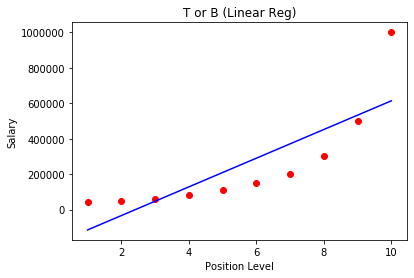

In [7]:
plt.scatter(x, y, color = 'red')
plt.plot(x, linreg.predict(x), color = 'blue')
plt.title('T or B (Linear Reg)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

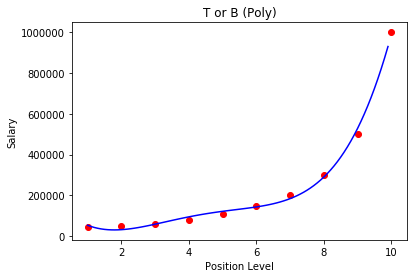

In [8]:
# plot with adjusted LOD for continous curve 
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, linreg2.predict(polyreg.fit_transform(x_grid)), color = 'blue')
plt.title('T or B (Poly)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [9]:
# with model fit, predict new employee 
pred = linreg.predict([[6.5]])
pred

array([330378.78787879])

In [10]:
pred = linreg2.predict(polyreg.fit_transform([[6.5]]))
pred

array([158862.45265153])